In [1]:
import csv
import os

## Function for Mean
def getMean(sampleList):
    sampleSize = len(sampleList)
    totalSumIncome = 0
    for row in sampleList:
        totalSumIncome = row + totalSumIncome
    mean = totalSumIncome / sampleSize
    return mean

## Function target sample Standard Deviation
def getSampleSD(sampleList):
    mean = getMean(sampleList)
    sumOfSquares = 0
    sampleSize = len(sampleList)
    for row in sampleList:
        deviationScore = row - mean
        sumOfSquares = deviationScore**2 + sumOfSquares
    
    variance = sumOfSquares / (sampleSize-1)
    sampleSD = variance**0.5
    return sampleSD

## Sample Standard Error
def getSampleStandardError(sampleList):
    sampleSize = len(sampleList)
    sampleSD = getSampleSD(sampleList)
    # standard error of the mean for the population
    SSE = sampleSD / sampleSize**0.5
    return SSE

In [2]:

# def getCriticalT(alpha, sampleList):
#     sampleSize = len(sampleList)
#     df = sampleSize - 1
#     criticalT = 0
#     with open('data/t_table.csv', newline='') as tFile:
#         tData = csv.reader(tFile)
#         for row in tData:
#             if int(row[0]) == df:
#                 if float(row[2]) >= (float(1-(alpha/2))):
#                     criticalT = float(row[1])
#                     break
#     print(criticalT)
#     return criticalT

def getCriticalT(alpha, sampleList):
    sampleSize = len(sampleList)
    df = sampleSize - 1
    if df > 120:
        df = 120
    criticalT = 0
    folder_path = r"..\..\data"
    csv_file_path = os.path.join(folder_path, "t_table.csv")
    with open(csv_file_path, newline='') as tFile:
        tData = csv.reader(tFile)
        for row in tData:
            if int(row[0]) == df:
                if float(row[2]) >= (float(1-(alpha/2))):
                    criticalT = float(row[1])
                    break
    return criticalT

In [3]:
##
def getCI(sampleList, alpha):
    mean = getMean(sampleList)
    SSE = getSampleStandardError(sampleList)
    critT = getCriticalT(alpha, sampleList)
    print('Critical T:', critT)
    lowerCI = mean - critT * SSE
    upperCI = mean + critT * SSE
    return lowerCI, upperCI

In [4]:
##
incomeData = []
folder_path = r"..\..\data"
csv_file_path = os.path.join(folder_path, "usa.csv")
with open(csv_file_path, newline='') as myFile:
    data = csv.reader(myFile)
    for row in data:
        if row[6] != 'INCTOT':
            if int(row[6]) > 1:
                if int(row[6]) != 9999999:
                    if int(row[1]) > 17:
                        incomeData.append(int(row[6]))

In [5]:
##
import random
incomeSample = random.sample(incomeData, 100)
alpha = 0.05
lower, upper = getCI(incomeData, alpha)
print('The 95% CI for the sample is', round(lower, 2), 'to', round(upper, 2))

Critical T: 1.98
The 95% CI for the sample is 47412.94 to 47580.24


In [6]:
##
def getCI(sampleList, alpha):
    mean = getMean(sampleList)
    SSE = getSampleStandardError(sampleList)
    critT = getCriticalT(alpha, sampleList)
    print('Critical T:', critT)
    lowerCI = mean - critT * SSE
    upperCI = mean + critT * SSE
    error = critT*SSE
    return lowerCI, upperCI, error

In [7]:
# ['SEX', 'AGE', 'RACE', 'RACED', 'EDUC', 'EDUCD', 'INCTOT']
# [ 0      1       2        3        4       5        6]

#SEX - 1 male, 2 female
#Race - 1 white, 2 black, 3

incomeDataMale = []
incomeDataFemale = []
folder_path = r"..\..\data"
csv_file_path = os.path.join(folder_path, "usa.csv")
with open(csv_file_path, newline='') as myFile:
    data = csv.reader(myFile)
    for row in data:
        if row[6] != 'INCTOT':
            if int(row[6]) > 1:
                if int(row[6]) != 999999:
                    if int(row[1]) > 17:
                        # Get male and female incomes
                        if int(row[0]) == 1:
                            incomeDataMale.append(int(row[6]))
                        if int(row[0]) == 2:
                            incomeDataFemale.append(int(row[6]))

In [8]:
import random
maleIncomeSample = random.sample(incomeDataMale, 50)
femaleIncomeSample = random.sample(incomeDataFemale, 50)

alpha = 0.05

maleLower, maleUpper, maleError = getCI(maleIncomeSample, alpha)
femaleLower, femaleUpper, femaleError = getCI(femaleIncomeSample, alpha)

maleIncomeMean = getMean(maleIncomeSample)
femaleIncomeMean = getMean(femaleIncomeSample)

print('The 95% CI for the male income sample is', round(maleLower, 2), 'to', round(maleUpper, 2))
print('The mean income for the male sample is', round(maleIncomeMean, 2))

print('The 95% CI for the female income sample is', round(femaleLower, 2), 'to', round(femaleUpper, 2))
print('The mean income for the female sample is', round(femaleIncomeMean, 2))

Critical T: 2.01
Critical T: 2.01
The 95% CI for the male income sample is 32543.04 to 56758.16
The mean income for the male sample is 44650.6
The 95% CI for the female income sample is 22923.87 to 40770.53
The mean income for the female sample is 31847.2


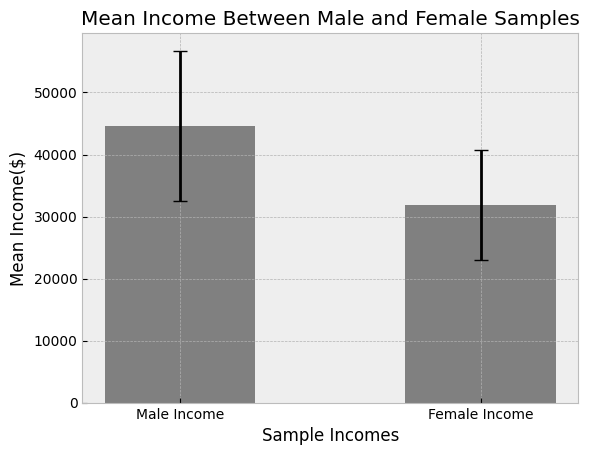

In [9]:
## Plot
import matplotlib.pyplot as plt
# print(plt.style.available)
plt.style.use('bmh')

labels = ['Male Income', 'Female Income']
means = [maleIncomeMean, femaleIncomeMean]
CIs = [maleError, femaleError]
positions = [0, 1]

plt.bar(positions, means, color='grey', yerr=CIs, width=0.5,
       align='center', ecolor='black', capsize=5)
plt.xlabel('Sample Incomes')
plt.ylabel('Mean Income($)')
plt.title('Mean Income Between Male and Female Samples')
plt.xticks(positions, labels)
plt.show()